In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mokillasaipraneeth","key":"06d09ec1b9cbcad2e5646743a9f96568"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d beatoa/spamassassin-public-corpus

Dataset URL: https://www.kaggle.com/datasets/beatoa/spamassassin-public-corpus
License(s): CC0-1.0
spamassassin-public-corpus.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q spamassassin-public-corpus.zip -d spamassassin-public-corpus
import os

# List all directories inside the extracted dataset folder
base_dir = "spamassassin-public-corpus"
for root, dirs, files in os.walk(base_dir):
    print(root)

replace spamassassin-public-corpus/easy_ham/__MACOSX/._easy_ham? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace spamassassin-public-corpus/easy_ham/__MACOSX/easy_ham/._0001.ea7e79d3153e7469e7a9c3e0af6a357e? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace spamassassin-public-corpus/easy_ham/__MACOSX/easy_ham/._0002.b3120c4bcbf3101e661161ee7efcb8bf? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace spamassassin-public-corpus/easy_ham/__MACOSX/easy_ham/._0002.b3120c4bcbf3101e661161ee7efcb8bf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace spamassassin-public-corpus/easy_ham/__MACOSX/easy_ham/._0003.acfc5ad94bbd27118a0d8685d18c89dd? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: spamassassin-public-corpus
spamassassin-public-corpus/spam_2
spamassassin-public-corpus/spam_2/spam_2
spamassassin-public-corpus/spam_2/__MACOSX
spamassassin-public-corpus/spam_2/__MACOSX/spam_2
spamassassin-public-corpus/easy_ham
spamassassin-public-corpus/easy_ham/__MACOSX
spamassa

In [ ]:
import os, re, joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Loaded 3948 emails (Spam: 1397, Ham: 2551)


,text,label,clean_text
0,From crackmice-admin@crackmice.com Wed Jul 3...,1,from crackmice admin crackmice com wed jul ret...
1,From yoshioha5857x55@lycos.com Thu Aug 8 11:...,1,from yoshioha x lycos com thu aug return path ...
2,Received: from hq.pro-ns.net (localhost [127.0...,1,received from hq pro ns net localhost by hq pr...
3,From hgh8728@polbox.com Mon Jun 24 17:08:15 2...,1,from hgh polbox com mon jun return path hgh po...
4,From atkinsonscott@fuse.net Wed Aug 1 17:24:...,1,from atkinsonscott fuse net wed aug return pat...


TF-IDF matrix shape: (3158, 5000)
📊 Naive Bayes Results:
Accuracy: 0.9873
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       510
           1       1.00      0.97      0.98       280

    accuracy                           0.99       790
   macro avg       0.99      0.98      0.99       790
weighted avg       0.99      0.99      0.99       790

📊 Logistic Regression Results:
Accuracy: 0.9899
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       510
           1       1.00      0.97      0.99       280

    accuracy                           0.99       790
   macro avg       0.99      0.99      0.99       790
weighted avg       0.99      0.99      0.99       790



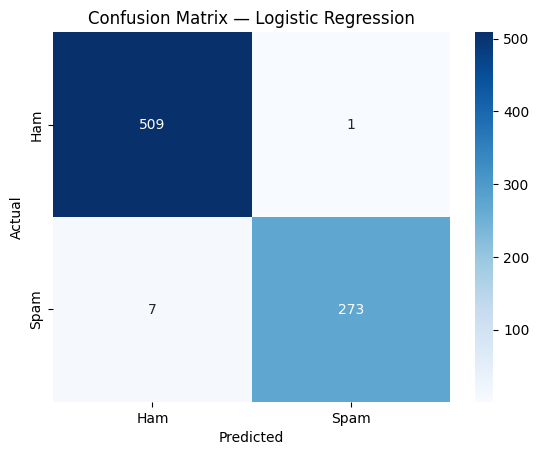

✅ Model and vectorizer saved successfully!

Prediction: SPAM


In [ ]:
def load_emails_from_dir(base_path, label):
    emails = []
    for filename in os.listdir(base_path):
        file_path = os.path.join(base_path, filename)
        if os.path.isfile(file_path):
            try:
                with open(file_path, encoding='latin-1') as f:
                    content = f.read()
                    emails.append((content, label))
            except Exception as e:
                # print(f"Error reading file {file_path}: {e}") # Optional: uncomment for debugging
                continue
    return emails

spam_path = "spamassassin-public-corpus/spam_2/spam_2" # Updated path
ham_path = "spamassassin-public-corpus/easy_ham/easy_ham" # Updated path

spam_emails = load_emails_from_dir(spam_path, 1)
ham_emails = load_emails_from_dir(ham_path, 0)

data = pd.DataFrame(spam_emails + ham_emails, columns=["text", "label"])
print(f"Loaded {len(data)} emails (Spam: {sum(data.label)}, Ham: {len(data)-sum(data.label)})")

def clean_text(text):
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()
    text = re.sub(r"\s+", " ", text).strip()
    return text

data["clean_text"] = data["text"].apply(clean_text)
display(data.head()) # Use display for better formatting

X_train, X_test, y_train, y_test = train_test_split(
    data["clean_text"], data["label"],
    test_size=0.2, random_state=42, stratify=data["label"]
)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF matrix shape: {X_train_tfidf.shape}")

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

print("📊 Naive Bayes Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_nb), 4))
print(classification_report(y_test, y_pred_nb))

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf, y_train)
y_pred_log = log_model.predict(X_test_tfidf)

print("📊 Logistic Regression Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 4))
print(classification_report(y_test, y_pred_log))

cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

joblib.dump(log_model, "spam_filter_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("✅ Model and vectorizer saved successfully!")

def predict_email(text):
    cleaned = clean_text(text)
    text_tfidf = vectorizer.transform([cleaned])
    prediction = log_model.predict(text_tfidf)[0]
    return "SPAM" if prediction == 1 else "HAM"

sample_email = """
Congratulations! You've won a $1000 Walmart gift card.
Please click the link below to claim your reward.
"""
print("\nPrediction:", predict_email(sample_email))